# Ejercicios 3. Recursividad

## Introducción
Su trabajo es resolver el siguiente rompecabezas.

<center>
<img src="https://cdn.kastatic.org/ka-perseus-images/5b5fb2670c9a185b2666637461e40c805fcc9ea5.png">
</center>

Usted tiene tres postes y un número de discos $N$ de diferentes tamaños que pueden deslizarse en cualquier poste. El rompecabezas comienza con los discos apilados de manera cónica en un poste, con el disco más grande en la parte inferior y el más pequeño en la parte superior. 

El objetivo del juego es mover toda la pila a otro poste, siguiendo estas simples reglas:

1. Solo se puede mover un disco a la vez.
2. Cada movimiento consiste en tomar el disco superior de una de las pilas y colocarlo en la parte superior de otra pila.
3. No se puede colocar un disco más grande encima de un disco más pequeño.

En internet puede encontrar el juego de forma interactiva [aquí](https://www.mathplayground.com/logic_tower_of_hanoi.html)

### 1. Caso base.
Suponga que $N = 3$. 

<center>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/tower-of-hanoi.png">
</center>

In [154]:
# El disco 3 es el más grande y la base de la torre. El disco dos es el mediano y el 1 está en el tope de la torre.
N = 3

posiciones_iniciales = {
    "A": list(range(N, 0, -1)),
    "B": [],
    "C": []
}

Cree una secuencia de tuplas que digan la secuencia de movimientos que llevan la Torre del poste A al C cumpliendo con todas las reglas del enunciado.

Las tuplas deben seguir el siguiente formato `(poste inicial, poste final, disco)`. Por ejemplo, llevar el disco 1 del poste A al C (tal como se muestra en la figura de arriba) sería `(A, C, 1)`.

La siguiente función recibirá una lista de movimientos (tuplas) y ejecutará los movimientos. Está lanzará un mensaje en caso de hacer algún movimiento no permitido.

In [169]:
import copy
import matplotlib.pyplot as plt
import numpy as np

class MovimientoInvalidoError(Exception):
    pass

def movimiento(posiciones_iniciales, movimiento):
    poste_inicial = movimiento[0]
    poste_final = movimiento[1]
    disco = movimiento[2]
    
    postes = posiciones_iniciales.keys()
    discos_superiores = [i[-1] if len(i) > 0 else 0 for i in posiciones_iniciales.values()]
    discos_superiores = dict(zip(postes, discos_superiores))

    disco_superior_inicial = discos_superiores[poste_inicial]
    disco_superior_final = discos_superiores[poste_final]

    if disco == disco_superior_inicial:
        if disco_superior_final < disco_superior_inicial:
            # Hacer una copia profunda para evitar modificar el original
            posiciones_finales = copy.deepcopy(posiciones_iniciales)
            posiciones_finales[poste_inicial].remove(disco)
            posiciones_finales[poste_final].append(disco)
            return posiciones_finales
        else:
            raise MovimientoInvalidoError(f"Movimiento invalido. El disco {disco} es más grande que el disco {disco_superior_final} que está en la cima del poste {poste_final}.")
    else:
        raise MovimientoInvalidoError(f"Movimiento invalido. El disco {disco} no está en la cima del poste {poste_inicial}.")

def dibujar_torres(posiciones, titulo = 'Torre de Hanoi'):
    altura = np.max([np.max(i) if len(i) > 0 else 0 for i in posiciones.values()]) - 1
    fig, ax = plt.subplots(figsize = (8, altura))
    ax.set_title(titulo)
    
    # Definir los postes y el espacio entre ellos
    postes = list(posiciones.keys())
    espacio_postes = np.linspace(1, len(postes)*2, len(postes))
    
    # Altura y anchura de los discos
    altura_disco = 0.4
    max_disco_width = 1.5
    
    for i, poste in enumerate(postes):
        discos = posiciones[poste]
        # Etiqueta del poste
        ax.text(espacio_postes[i], -0.5, f'Poste {poste}', ha='center')
        for j, disco in enumerate(discos):
            # Calcular el ancho del disco basado en su valor
            disco_width = max_disco_width * (disco / max(max(discos), 1)) if discos else 0.1
            bar = ax.bar(espacio_postes[i], altura_disco, width=disco_width, bottom=j*altura_disco, color='skyblue', edgecolor='black')
            # Etiqueta del disco
            ax.text(espacio_postes[i], j*altura_disco + altura_disco/2, f'Disco {disco}', ha='center', va='center')
        
        # Dibujar el poste
        ax.plot([espacio_postes[i], espacio_postes[i]], [0, len(discos)*altura_disco], color='saddlebrown', linewidth=2)

    ax.set_ylim(0, altura)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_frame_on(False)

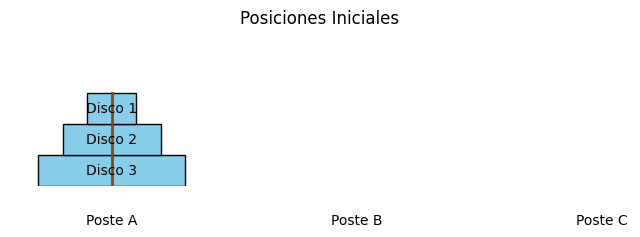

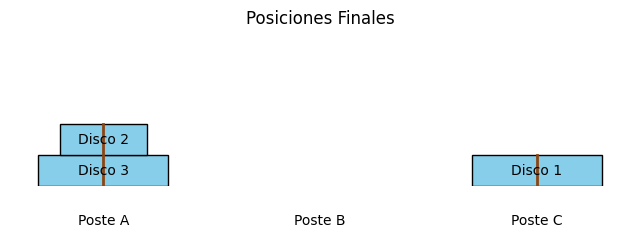

In [170]:
# Ejemplo de uso
N = 3
posiciones_iniciales = {"A": list(range(N, 0, -1)), "B": [], "C": []}
posiciones_finales = movimiento(posiciones_iniciales, ('A', 'C', 1))

# Dibujar las posiciones iniciales
dibujar_torres(posiciones_iniciales, titulo='Posiciones Iniciales')
# Dibujar las posiciones finales (asegúrate de tener posiciones_finales actualizadas)
dibujar_torres(posiciones_finales, titulo='Posiciones Finales')